In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from datatools import extract_market_data
from pipeline import Dataset

dataset = Dataset.load('../../data/parsed')
df_return = dataset.ref_return
df_return

return
day asset          
1   0     -0.026877
    1     -0.052674
    2     -0.002691
    3     -0.018515
    4     -0.019184
...             ...
998 49    -0.014799
    50     0.012921
    51    -0.052286
    52    -0.015559
    53    -0.003662

[53892 rows x 1 columns]

In [11]:
"""define a dataframe of size 998 * 54"""
asset = np.arange(0, 54)
day = np.arange(0, 998)
new_df_return = pd.DataFrame(np.zeros((998,54)))
new_df_return.columns = asset
new_df_return.index = day
for i in range(54):
        new_df_return[i] = df_return[(df_return.index.get_level_values('asset') == i)].to_numpy()

new_df_return


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,-0.026877,-0.052674,-0.002691,-0.018515,-0.019184,0.024430,0.018743,0.014376,-0.011925,-0.020020,...,-0.037666,0.065576,-0.010035,0.025246,0.017829,-0.044712,-0.007965,-0.034728,0.010344,-0.022079
1,0.028805,0.073718,0.030722,0.069478,0.012317,-0.014750,0.003039,0.040212,0.036370,0.056693,...,0.033443,0.053596,0.102177,0.024756,-0.005975,0.074563,0.022999,0.021626,0.047195,0.048434
2,0.107928,0.107233,0.043125,0.068729,0.053803,0.022308,-0.015340,0.058267,0.050725,0.051030,...,0.101975,0.007098,0.099916,0.072910,-0.011684,0.053964,0.028075,0.026395,0.062861,0.055009
3,0.068998,0.048509,0.032530,-0.003820,0.036502,0.067772,-0.030400,0.009663,0.000000,0.019491,...,0.042561,-0.023125,-0.023693,0.032685,0.033657,-0.011736,0.007944,-0.002346,0.015491,0.008149
4,-0.027238,0.010756,-0.028420,-0.026482,-0.025518,0.020314,-0.049842,-0.012399,-0.013797,-0.019397,...,-0.040404,-0.038773,-0.026707,-0.006748,0.002366,-0.019331,-0.010403,-0.004677,-0.009621,-0.006686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,-0.026212,0.022508,-0.006676,0.005504,0.010076,-0.004818,-0.006452,-0.006251,0.000000,-0.018065,...,0.030857,-0.003118,-0.003250,0.000000,-0.054357,-0.010138,0.074911,-0.033228,0.007220,0.020942
994,-0.000985,0.028980,-0.030473,-0.005496,0.026758,-0.004814,-0.006516,-0.013585,-0.012176,0.000000,...,-0.027002,0.000000,0.006494,0.002813,0.022229,-0.007664,0.085252,-0.024464,0.005946,0.042851
995,0.003992,0.010193,-0.012935,-0.002731,0.027063,-0.029019,0.016289,-0.024647,-0.024352,0.028624,...,-0.049578,-0.017185,0.003369,-0.010317,-0.032560,-0.019619,0.027650,-0.043767,0.002954,0.050002
996,-0.023552,-0.047997,-0.003142,-0.009686,-0.041148,-0.039956,0.016423,-0.025423,-0.016959,0.016326,...,-0.046893,-0.023368,-0.039355,-0.007942,-0.114131,-0.021437,-0.009550,-0.065832,-0.015625,0.019924


In [19]:
"""return the correlation between x and y"""
def sim(x, y):
    return np.corrcoef(x, y)[0, 1]


In [20]:
stock_names = new_df_return.columns.to_numpy()
stock_index = np.arange(0, len(stock_names))
numpy_stock_return = new_df_return.to_numpy().T
print(stock_index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]


In [21]:
"""implement a simulated annealing algorithm to find the best clustering"""
"""first, we need to define a function to calculate the cost of a clustering"""
w = 0.5 #you can change the value of w, which is usually between 0.4 and 0.6
k = 0.0001
n = 8

def number_of_clusters(clustering):
    cluster_numbers = 0
    visited_cluster = []
    for element in clustering:
        if element not in visited_cluster:
            visited_cluster.append(element)
            cluster_numbers = cluster_numbers + 1
    return cluster_numbers

def cost(clustering):
    """clustering is a list of the same length of stocks, and each element is the cluster that the stock belongs to"""
    cost = 0
    cluster_numbers = number_of_clusters(clustering)

    for i in range(0, len(clustering)):
        for j in range(0, len(clustering)):
            if clustering[i] == clustering[j]:
                cost = cost + sim(i, j)

    new_cost = cluster_numbers - (k / (cluster_numbers - 1)) * cost
    return new_cost


"""define a function to generate a random clustering"""
def random_clustering():
    clustering = np.zeros(len(stock_names))
    for i in range(0, len(stock_names)):
        clustering[i] = np.random.randint(0, n)
    return clustering

"""define a function to generate a neighbor of a clustering"""
def neighbor(clustering):
    neighbor = clustering.copy()
    index = np.random.randint(0, len(stock_names))
    neighbor[index] = np.random.randint(0, n)
    return neighbor, index

"""define a function to calculate the probability of accepting a neighbor"""
def probability(cost, neighbor_cost, temperature):
    if neighbor_cost < cost:
        return 1
    else:
        return np.exp((cost - neighbor_cost) / temperature)

"""define a function to update the temperature"""
def update_temperature(temperature):
    alpha = 0.99 # alpha is a hyperparameter, you can change the value of alpha
    return temperature * alpha

"""define a function to run the simulated annealing algorithm"""
def simulated_annealing():
    temperature = 100 # temperature is a hyperparameter, you can change the value of temperature
    clustering = random_clustering()
    cost_clustering = cost(clustering)
    T_final = 0.1 # T_final is a hyperparameter, you can change the value of T_final
    while temperature > T_final:
        neighbor_clustering, index = neighbor(clustering)
        change = 0
        cluster_numbers = number_of_clusters(clustering)
        for i in range(0, len(stock_names)):
            if i != index and clustering[i] == clustering[index]:
                change = change + sim(i, index) * (k / (cluster_numbers - 1))
            if i != index and neighbor_clustering[i] == neighbor_clustering[index]:
                change = change - sim(i, index)* (k / (cluster_numbers - 1))
        neighbor_cost_clustering = cost_clustering + change
        if probability(cost_clustering, neighbor_cost_clustering, temperature) > np.random.random():
            clustering = neighbor_clustering
            cost_clustering = neighbor_cost_clustering
        temperature = update_temperature(temperature)
    return clustering


In [22]:
best_clustering = random_clustering()
best_cost = cost(best_clustering)
for i in range(0, 100):
    clustering = simulated_annealing()
    if cost(clustering) > best_cost:
        best_clustering = clustering
        best_cost = cost(clustering)

"""print the best clustering"""
print(best_clustering)

"""print the number of clusters"""
print(number_of_clusters(best_clustering))

C:\Users\specf\anaconda3\envs\qids-2023-comp\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\specf\anaconda3\envs\qids-2023-comp\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\specf\anaconda3\envs\qids-2023-comp\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


[7. 7. 3. 7. 0. 3. 4. 3. 6. 3. 4. 6. 1. 4. 7. 5. 7. 6. 4. 7. 0. 2. 1. 4.
 2. 2. 5. 0. 1. 2. 0. 0. 7. 2. 1. 5. 5. 6. 6. 7. 7. 6. 1. 3. 4. 3. 0. 3.
 1. 0. 6. 5. 0. 5.]
8


In [23]:
from collections import defaultdict
table = defaultdict(list)
for i in range(0, len(best_clustering)):
    cluster = best_clustering[i]
    table[cluster].append(stock_names[i])

for key, value in table.items():
    print(key, value)

def cul_return(r):
    log_return = np.log(1 + r)
    cul_log_return = np.cumsum(log_return, axis = 0)
    cul = np.exp(cul_log_return)
    return cul



7.0 [0, 1, 3, 14, 16, 19, 32, 39, 40]
3.0 [2, 5, 7, 9, 43, 45, 47]
0.0 [4, 20, 27, 30, 31, 46, 49, 52]
4.0 [6, 10, 13, 18, 23, 44]
6.0 [8, 11, 17, 37, 38, 41, 50]
1.0 [12, 22, 28, 34, 42, 48]
5.0 [15, 26, 35, 36, 51, 53]
2.0 [21, 24, 25, 29, 33]


In [27]:
idx = pd.IndexSlice

table[2]
df_return.loc[idx[:, table[2]], :]

return
day asset          
1   21     0.065556
    24    -0.011570
    25    -0.030412
    29     0.025482
    33     0.001094
...             ...
998 21    -0.008273
    24    -0.010515
    25    -0.014385
    29     0.013723
    33    -0.003797

[4990 rows x 1 columns]

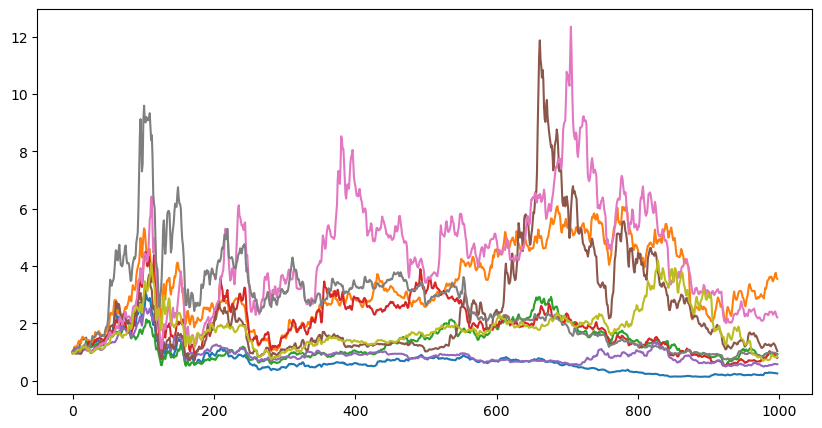

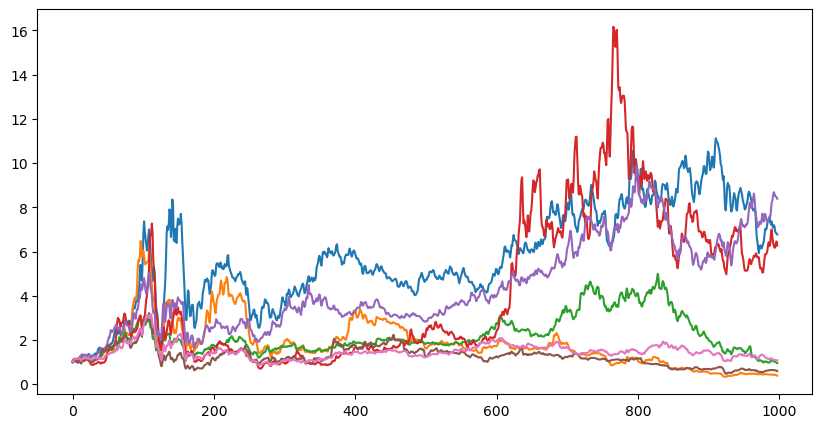

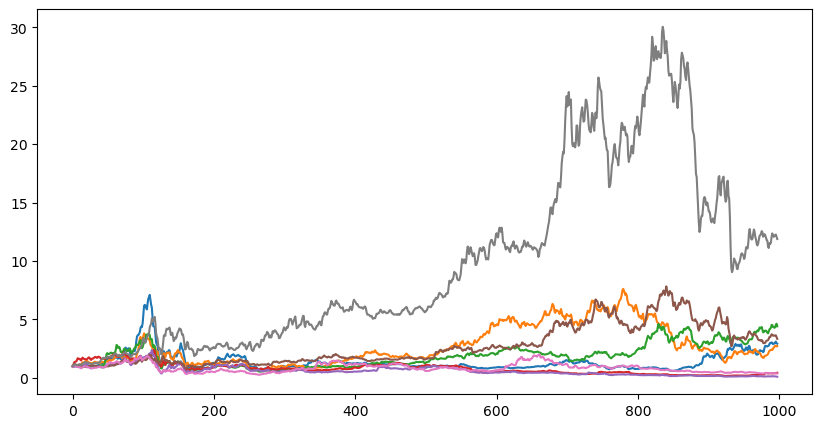

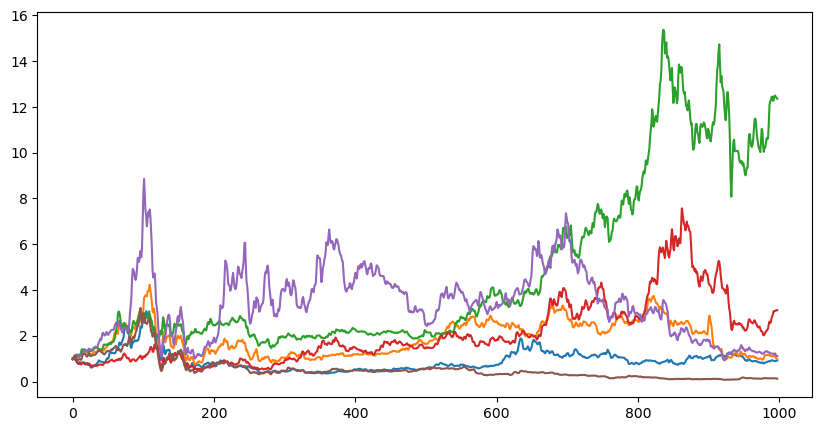

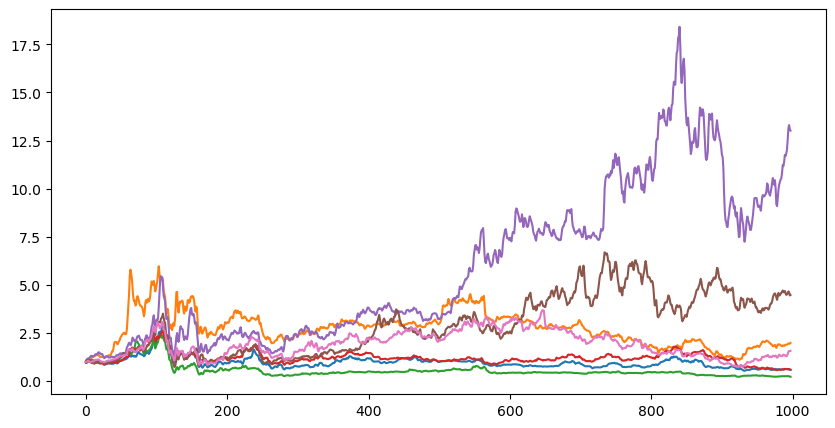

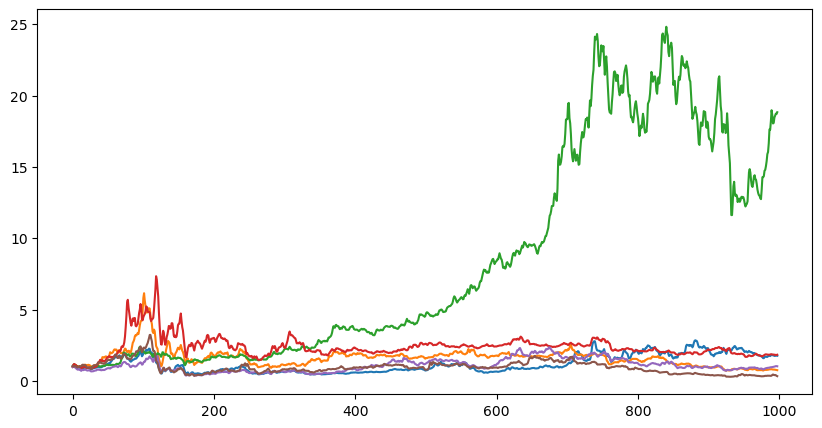

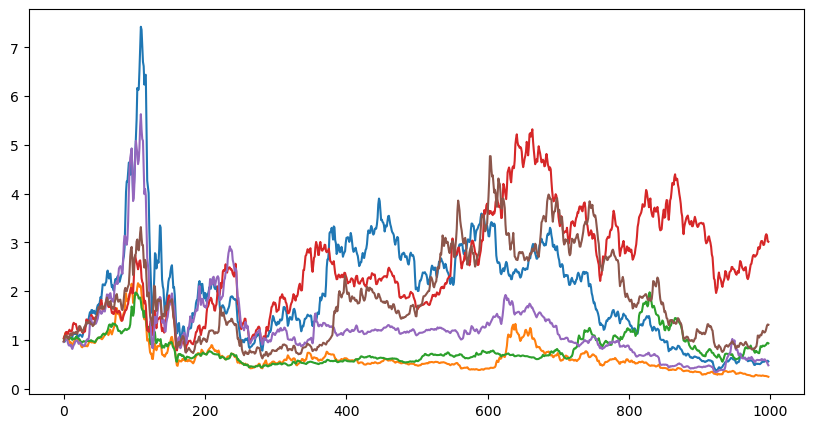

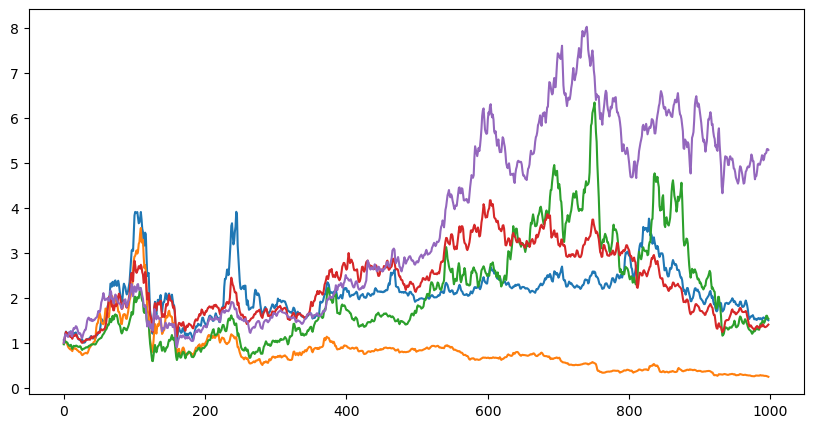

In [24]:

for key in table.keys():
    plt.figure(figsize=(10, 5))
    for i in range(0, len(table[key])):
        n = new_df_return[table[key][i]].to_numpy().T
        cul = cul_return(n)
        plt.plot(cul)
    plt.show()